In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [66]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/dataset.csv",index_col=0)
print(df.head(10))

    age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0  42.0       1        5.0        1   18000      0    0.0    1.0      0   
1  51.0       3       18.0        1   23000      0    0.0    0.0      0   
2  40.0       0        8.0        1   10000      0    0.0    0.0      0   
3  19.0       0       25.0        5   31000      2    1.0    0.0      0   
4  42.0       2       13.0        1   40000      0    1.0    0.0      0   
5  48.0       2       13.0        1   11000      0    0.0    0.0      1   
6  33.0       0       22.0        2   36400      0    1.0    0.0      2   
7  55.0       2        8.0        2   28000      0    0.0    0.0      0   
8  40.0       3       18.0        3   12000      0    0.0    0.0      1   
9  46.0       2       13.0        1   35000      2    0.0    2.0      1   

   phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0      0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
1      0  ...    3.0    6.

<AxesSubplot:>

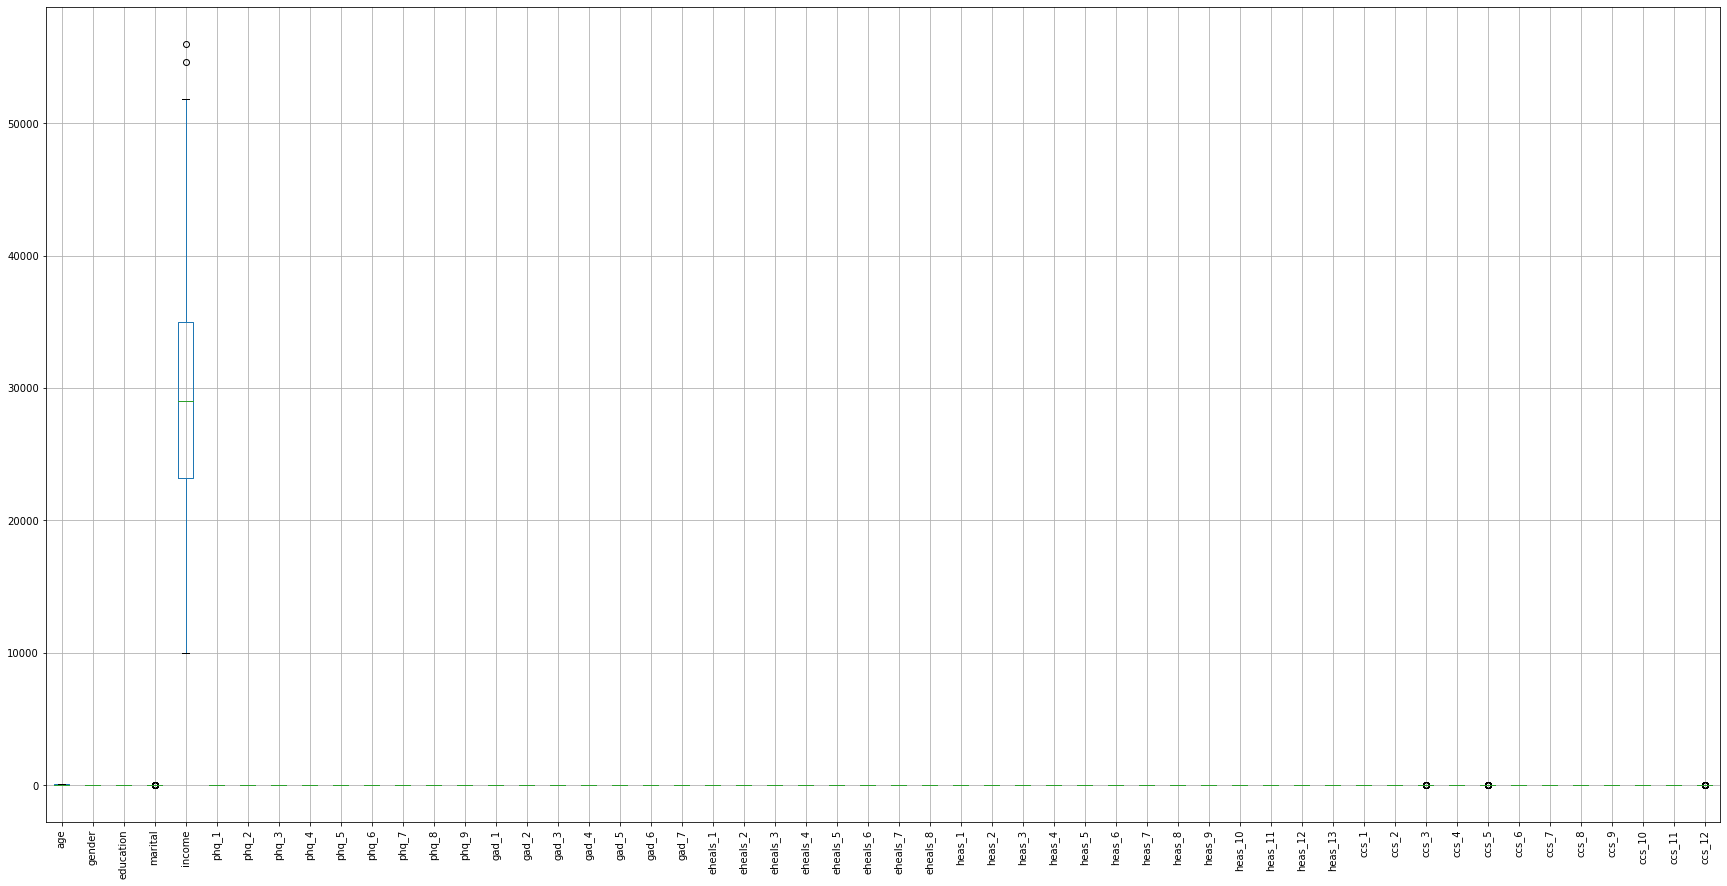

In [67]:
df.boxplot(rot=90,figsize=(30,15))

In [68]:
## INCOME 
df_income = df.income
max_income = max(df_income)
min_income = min(df_income)

df_income = (df_income - min_income)/(max_income - min_income)

df['income'] = df_income

## AGE
df_age = df.age
max_age = max(df_age)
min_age = min(df_age)

df_age = (df_age - min_age)/(max_age - min_age)

df['age'] = df_age

## EDUCATION
df_education = df.education
max_education = max(df_education)
min_education = min(df_education)

df_education = (df_education - min_education)/(max_education - min_education)

df['education'] = df_education

<AxesSubplot:>

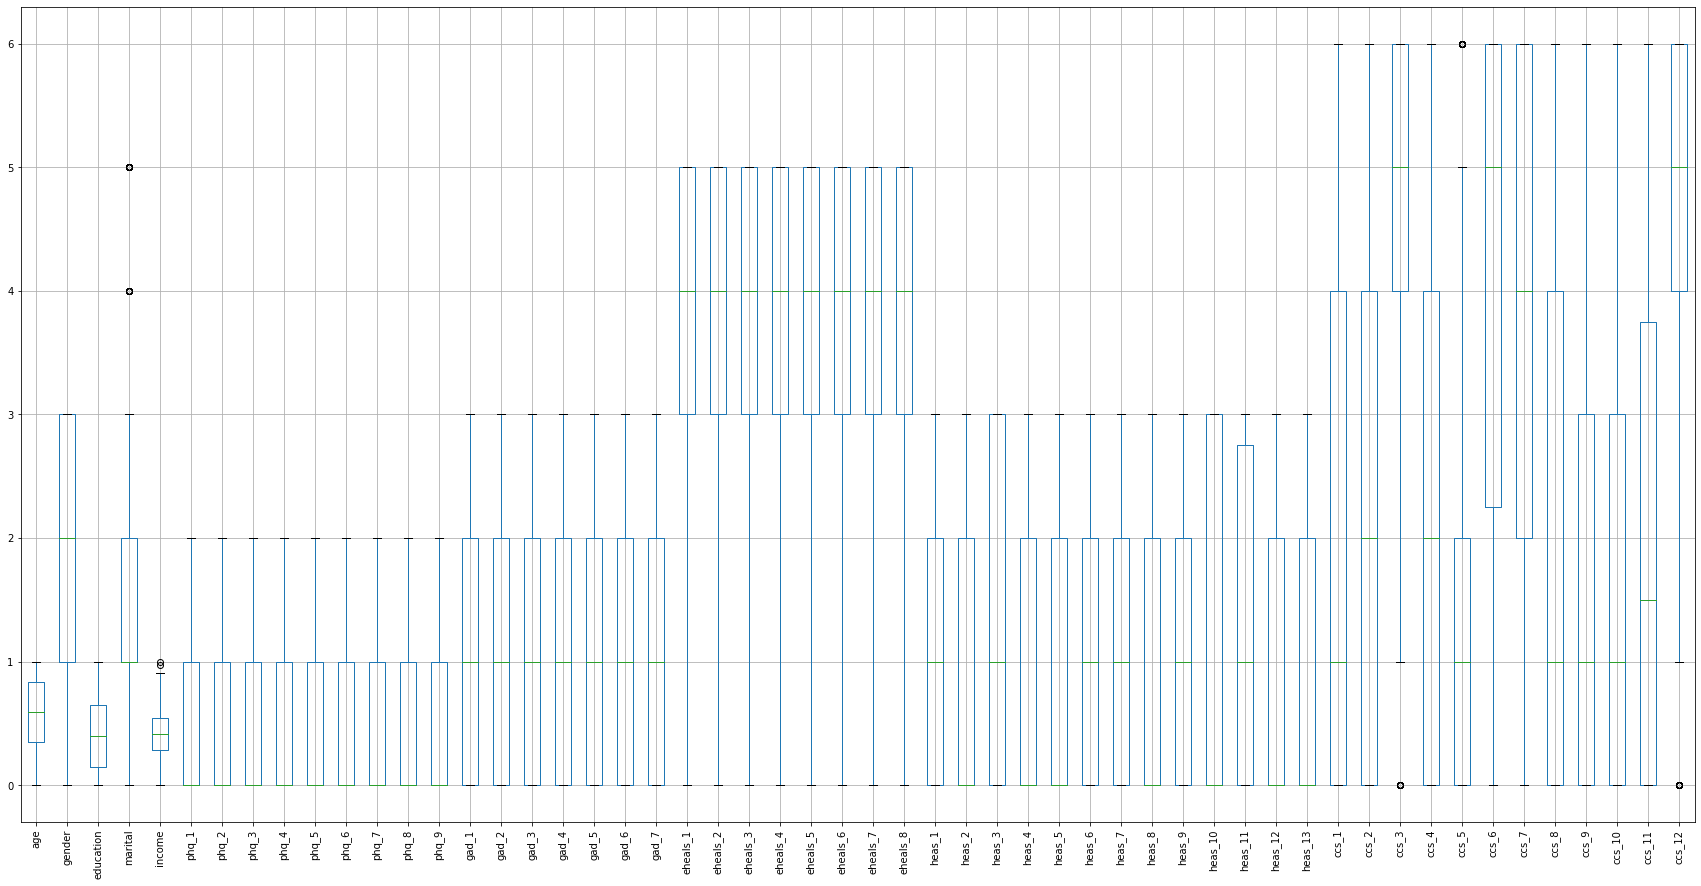

In [69]:
df.boxplot(rot=90,figsize=(30,15))

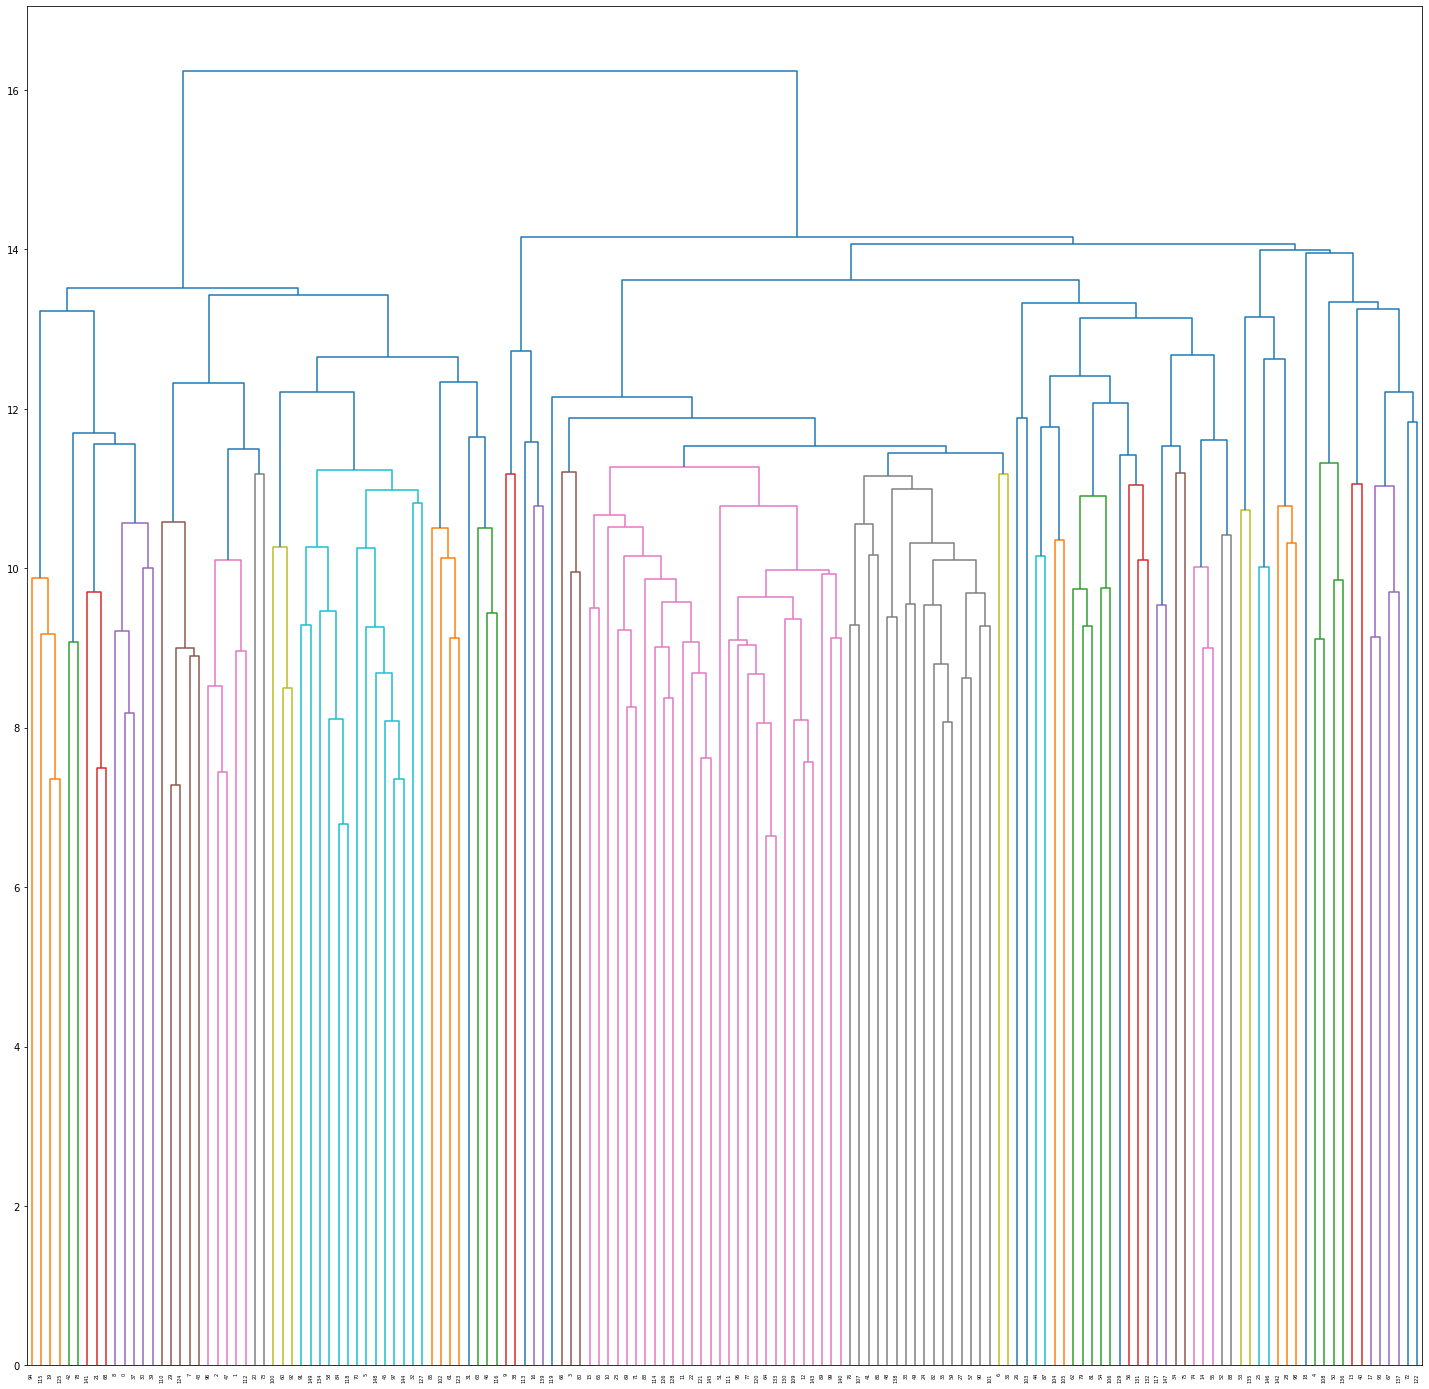

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

linkageData = linkage(df,method='average',metric='euclidean')

plt.figure(figsize=(25,25))
dendrogram(linkageData)
plt.show()


In [71]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='average')

unique = np.unique(clusterLabels)
print(unique)

[1 2 3]


In [72]:
from sklearn.metrics import silhouette_samples,silhouette_score

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

For n_clusters = 3 The average silhouette_score is : 0.1055208832812108
[ 0.19399697  0.156711    0.1914034   0.16923675  0.07277974  0.18524912
  0.06919441  0.13204817  0.16387353  0.12037575  0.16150085  0.10387254
  0.16129798  0.04199458  0.06708026  0.15423391  0.15379798  0.1035837
  0.05026999  0.04119473  0.20293902  0.23841262  0.20164203  0.16907165
  0.10353893  0.05324249 -0.02637856  0.13253453  0.04865586  0.13623916
  0.22921088  0.01190546  0.19167485  0.06075465 -0.04775303  0.12976862
  0.03436025  0.17474065  0.16620047  0.21581088  0.05931995  0.1147471
  0.17734619  0.12702183 -0.07248627  0.24791737  0.19824677  0.23273124
  0.0966508   0.12925618  0.06232137  0.09892401  0.09005289 -0.03953976
  0.10196865  0.01829049  0.01557713 -0.00799032  0.23065699  0.11470909
  0.1316883   0.02600733  0.01637705  0.23403496  0.16424755  0.13141402
  0.07049512  0.01183726  0.19100633  0.16254417  0.19813074  0.14919581
 -0.06489234  0.16865322  0.1046292  -0.01962462  0.08

In [73]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='single')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : -0.001030696409097244
[-0.13567684  0.01405613 -0.0234417  -0.01469797  0.07298428 -0.07214632
  0.00279268  0.04969368 -0.06521966 -0.14347713  0.09875794  0.0225323
 -0.13830874 -0.08771475 -0.01720586  0.00887371 -0.07453427 -0.0882005
 -0.08604331  0.11523968  0.03276715  0.03800027  0.09890776  0.02831441
  0.06142079  0.29226605 -0.09352078  0.02663444 -0.10071628 -0.00700469
 -0.04376299 -0.07468571  0.06066518  0.07743254  0.06797438  0.0642925
  0.06527516 -0.10034416 -0.11276222 -0.03260477 -0.09602883  0.04654509
 -0.08445249  0.04132384  0.05888694  0.00499642 -0.05211841 -0.03995023
  0.06953588  0.07914964 -0.13349611 -0.04756959 -0.03967714 -0.06024031
  0.05552738 -0.07776637  0.02994281  0.00582663  0.00972314  0.07242298
  0.00329719 -0.00798366  0.0629029  -0.10103845  0.04109438  0.03934952
 -0.05092042 -0.10400303 -0.05548761  0.05838008  0.01732597  0.11043812
 -0.18928816 -0.02679437  0.00251768  0.0021

In [74]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='complete')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.11237447437132725
[ 0.11188476  0.12944321  0.16453537  0.1523886   0.02550633  0.16639121
  0.13827789  0.18563992  0.10149737  0.06822779  0.13806893  0.15896272
  0.09342606  0.04518959  0.0223223   0.16990946  0.00282133  0.0156691
  0.06518605  0.16211789  0.17861163  0.21846074  0.15030008  0.17491061
  0.15073838  0.04461016  0.00326172  0.19230945 -0.00605015  0.1771054
  0.1492408   0.04543658  0.21024787  0.17558298  0.07622746  0.19168268
  0.14840438  0.17306584  0.06592206  0.16260398  0.07710588  0.13819078
  0.12956844  0.18504853  0.02340874  0.16151674  0.13047504  0.18035502
  0.0997328   0.18015562  0.08704118  0.09485728  0.02681783 -0.03302538
  0.04604907  0.03246763 -0.03058366  0.17288858  0.2084326   0.17734397
  0.14350068  0.17941751  0.00781243  0.13217051  0.15619344  0.12708465
  0.0799283  -0.01061506  0.17183078  0.1691914   0.16507844  0.19973847
  0.03044017  0.16060583  0.04474288  0.08275

In [75]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='weighted')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.11127010112908024
[ 0.11258861  0.10031275  0.14710086  0.14124557  0.03599123  0.1799937
  0.11581398  0.14908631  0.11741391  0.04571175  0.13504663  0.15005761
  0.13218228  0.02711872  0.06254062  0.16151334 -0.0314377   0.00065804
  0.04959461  0.15203191  0.14846852  0.2093127   0.13008839  0.16267352
  0.17243336  0.04172449  0.0288821   0.20039911  0.01730085  0.1520612
  0.14990195  0.02267842  0.19119533  0.20099359 -0.0178764   0.18077387
  0.15364232  0.1841011   0.05041451  0.14366158  0.0418058   0.15550738
  0.14876874  0.14486488  0.00352328  0.17225517  0.15506829  0.1675202
  0.13323905  0.17128839  0.0406414   0.13652727  0.05553075 -0.0142985
  0.03620909  0.01480268 -0.01193777  0.17856125  0.1894534   0.18997136
  0.12783838  0.1790536   0.05335448  0.1544555   0.15807456  0.11401606
  0.10790333  0.05057154  0.16413071  0.15284301  0.14229639  0.19654168
  0.01525927  0.14589056  0.04378649 -0.0116788

In [76]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='centroid')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : -0.011872341068235238
[-1.24607983e-01 -1.61176533e-01 -3.63162032e-01  8.90753399e-02
 -1.27941089e-02 -7.34882319e-02  1.61318833e-02 -7.28540215e-02
 -2.37165718e-01  1.15977204e-01  1.10453502e-01  1.65095669e-01
  1.71644546e-02 -2.09405607e-01 -1.41320632e-02  1.01077112e-02
  2.74528425e-02 -7.67692798e-02  2.81715648e-02 -7.02649985e-02
 -2.47835739e-01 -1.06787205e-01  1.10212698e-01  1.22719125e-01
  1.39359085e-01 -5.17280404e-02  3.08405897e-02  8.30108746e-02
 -5.88132409e-02 -5.48070827e-02 -2.57734480e-01 -9.58332366e-02
 -1.00594624e-01  8.74183017e-02  1.72283240e-01  1.43460545e-01
  1.18820254e-01 -1.66202774e-01  1.40287174e-01 -3.27161033e-01
  0.00000000e+00  1.46674454e-02 -8.87276166e-02  8.86140281e-04
 -2.49934388e-02 -1.06669165e-01 -8.37677463e-02 -1.13120437e-01
 -6.74513876e-02  1.36551216e-01 -1.17865268e-01 -9.48291550e-02
  6.73690821e-02  1.54999423e-01  4.80820180e-02  1.61852696e-04
 -1.399

In [77]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='ward')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.12283811665339904
[ 0.1252018   0.10965183  0.15949433  0.19559653  0.00719092  0.18483972
  0.14753095  0.14722094  0.11234235 -0.01027728  0.1800724   0.18623027
  0.19187077  0.00542416  0.03918667  0.2166273   0.06723308 -0.04653296
  0.02367789  0.12612216  0.15219316  0.20932707  0.19943245  0.2256951
  0.19544     0.03498019  0.01397565  0.23728094  0.00641979  0.15502631
  0.1625697   0.00955881  0.19004445  0.22101216 -0.0100914   0.217973
  0.14151148  0.18417727 -0.00133518  0.15236417  0.0135175   0.18229041
  0.15320075  0.14261914  0.03259896  0.19365976  0.16451713  0.1858553
  0.14921312  0.21655931  0.01275086  0.16144214  0.0328795   0.04841395
  0.02972672  0.0248902  -0.01052583  0.17708394  0.20398517  0.20905136
  0.12277879  0.15847517  0.04744864  0.16822526  0.21672148  0.16190696
  0.12713114  0.04079678  0.16775669  0.2129638   0.15759414  0.24772946
  0.0269452   0.14824518  0.01840597 -0.0139696

In [78]:
from scipy.cluster.vq import kmeans2

In [79]:
while True: 
    centroids, clusterLabels = kmeans2(data=df, k=3, iter=1000, minit='++')
    
    unique = np.unique(clusterLabels)
    #print(unique)
    
    silhouette_avg = silhouette_score(df, clusterLabels)
    #print("For n_clusters =", str(3), "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df, clusterLabels)
    #
    
    count = 0
    for value in sample_silhouette_values:
        if value <= 0:
            count += 1
    #print("Number of values below 0: ", count)
    if count == 0: 
        finalLabels = clusterLabels
        break 

In [80]:
sample_silhouette_values = silhouette_samples(df, finalLabels)
count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print(count)

0


In [81]:
finalLabels = finalLabels + 1
finalLabels

array([3, 1, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3,
       2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2, 2, 3, 3, 2, 1, 2, 1, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 3, 3], dtype=int32)

In [82]:
finalLabels = pd.DataFrame(finalLabels,columns=['Cluster label'])
df['Cluster label'] = finalLabels

df.to_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/datasetWithClusterLabels.csv")